## Import Packages

In [49]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import os
import glob
from moviepy.editor import VideoFileClip
import matplotlib.gridspec as gridspec
%matplotlib inline

## 1.Đọc dữ liệu

In [50]:
os.listdir("images_input/")

['1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg', '6.jpg', '7.jpg', '8.jpg']

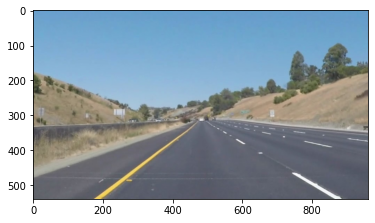

In [51]:
image = mpimg.imread('images_input/6.jpg')
plt.imshow(image)

In [52]:
def list_images(images, cols = 4, rows = 8, cmap=None):
    plt.figure(figsize=(10, 11))
    for i, image in enumerate(images):
        plt.subplot(rows, cols, i+1)
        cmap = 'gray' if len(image.shape) == 2 else cmap
        plt.imshow(image, cmap = cmap)
        plt.xticks([])
        plt.yticks([])
    plt.tight_layout(pad=0, h_pad=0, w_pad=0)
    plt.show()

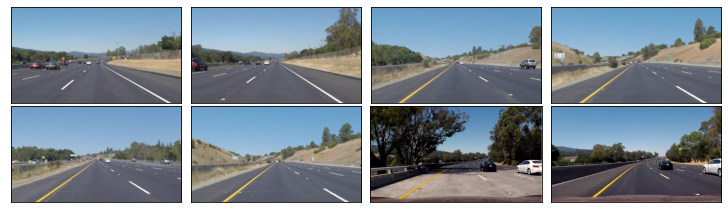

In [53]:
test_images = [plt.imread(img) for img in glob.glob('images_input/*.jpg')]
list_images(test_images)


## 2. Chọn màu: Các vạch đường trong hình ảnh trên có màu trắng và vàng. Cần chọn không gian màu phù hợp để làm nổi bật các vạch của làn đường.

### Màu RGB

In [54]:
def RGB_color_selection(image):
    """Áp dụng lựa chọn màu sắc cho hình ảnh RGB để mất tất cả ngoại trừ các vạch kẻ làn đường màu trắng và vàng."""
    
    #White color mask
    lower_threshold = np.uint8([200, 200, 200])
    upper_threshold = np.uint8([255, 255, 255])
    white_mask = cv2.inRange(image, lower_threshold, upper_threshold)
    
    #Yellow color mask
    lower_threshold = np.uint8([175, 175,   0])
    upper_threshold = np.uint8([255, 255, 255])
    yellow_mask = cv2.inRange(image, lower_threshold, upper_threshold)
    
    #Combine white and yellow masks
    mask = cv2.bitwise_or(white_mask, yellow_mask)
    masked_image = cv2.bitwise_and(image, image, mask = mask)
    
    return masked_image

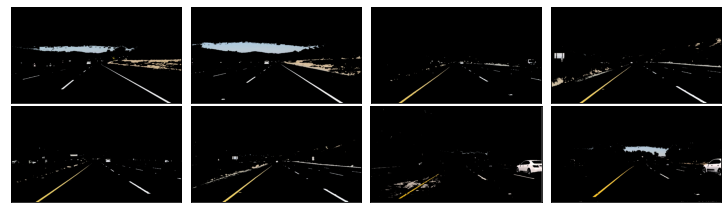

In [55]:
list_images(list(map(RGB_color_selection, test_images)))

### HSV color space: Là một đại diện thay thế của mô hình màu RGB. Các mô hình HSV màu sắc trộn lẫn với nhau, với kích thước bão hòa giống như các sắc thái khác nhau của màu sắc và kích thước giá trị giống như hỗn hợp của những loại sơn đó với số lượng đen hoặc trắng khác nhau.

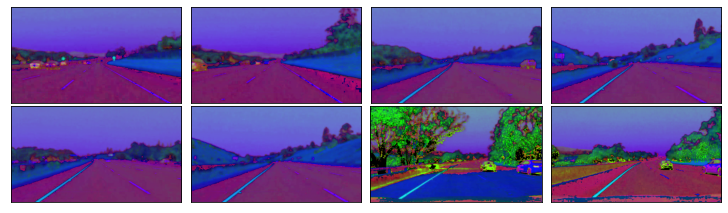

In [56]:
def convert_hsv(image):
    """Chuyển đổi hình ảnh RGB sang HSV."""
    return cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

list_images(list(map(convert_hsv, test_images)))

In [57]:
def HSV_color_selection(image):
    """Áp dụng lựa chọn màu sắc cho hình ảnh HSV để xóa tất cả ngoại trừ các đường làn màu trắng và vàng."""
    
    #Chuyển đổi hình ảnh đầu vào sang HSV
    converted_image = convert_hsv(image)
    
    #White color mask
    lower_threshold = np.uint8([0, 0, 210])
    upper_threshold = np.uint8([255, 30, 255])
    white_mask = cv2.inRange(converted_image, lower_threshold, upper_threshold)
    
    #Yellow color mask
    lower_threshold = np.uint8([18, 80, 80])
    upper_threshold = np.uint8([30, 255, 255])
    yellow_mask = cv2.inRange(converted_image, lower_threshold, upper_threshold)
    
    #Kết hợp white and yellow masks
    mask = cv2.bitwise_or(white_mask, yellow_mask)
    masked_image = cv2.bitwise_and(image, image, mask = mask)
    
    return masked_image

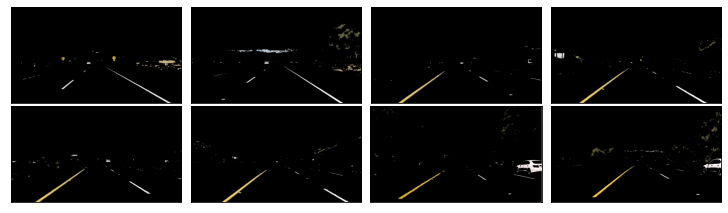

In [58]:
#Áp dụng lựa chọn màu sắc cho "test_images" trong không gian màu HSV.
list_images(list(map(HSV_color_selection, test_images)))

### HSL color space: Là một đại diện thay thế của mô hình màu RGB. Mô hình HSL cố gắng giống với các mô hình màu sắc nhận thức hơn như NCS hoặc Munsell, đặt màu bão hòa hoàn toàn xung quanh một vòng tròn với giá trị nhẹ là 1/2, trong đó giá trị độ sáng của 0 hoặc 1 là hoàn toàn đen hoặc trắng, tương ứng.

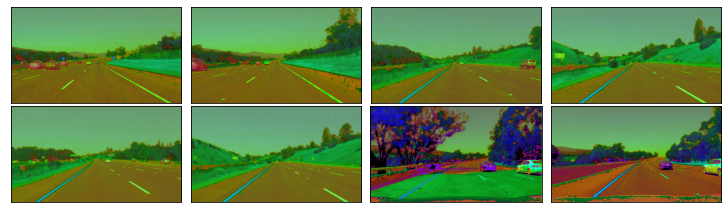

In [59]:
def convert_hsl(image):
    """Chuyển đổi hình ảnh RGB sang HSL."""
    return cv2.cvtColor(image, cv2.COLOR_RGB2HLS)

list_images(list(map(convert_hsl, test_images)))

In [60]:
def HSL_color_selection(image):
    """ Áp dụng lựa chọn màu sắc cho hình ảnh HSL để xóa tất cả ngoại trừ các đường làn màu trắng và vàng."""
    
    #Chuyển đổi hình ảnh đầu vào sang HSL
    converted_image = convert_hsl(image)
    
    #White color mask
    lower_threshold = np.uint8([0, 200, 0])
    upper_threshold = np.uint8([255, 255, 255])
    white_mask = cv2.inRange(converted_image, lower_threshold, upper_threshold)
    
    #Yellow color mask
    lower_threshold = np.uint8([10, 0, 100])
    upper_threshold = np.uint8([40, 255, 255])
    yellow_mask = cv2.inRange(converted_image, lower_threshold, upper_threshold)
    
    #Kết hợp white and yellow masks
    mask = cv2.bitwise_or(white_mask, yellow_mask)
    masked_image = cv2.bitwise_and(image, image, mask = mask)
    
    return masked_image

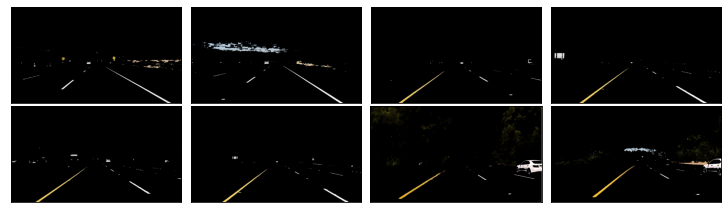

In [61]:
#Áp dụng lựa chọn màu sắc cho "test_images" trong không gian màu HSL.
list_images(list(map(HSL_color_selection, test_images)))

In [62]:
#Sử dụng HSL tạo ra các vạch kẻ đường rõ ràng của tất cả các không gian màu sắc. 
color_selected_images = list(map(HSL_color_selection, test_images))

## 3. Canny Edge Detection: Máy dò cạnh Canny dùng để phát hiện cạnh sử dụng thuật toán nhiều giai đoạn để phát hiện một loạt các cạnh trong hình ảnh.

### Gray scaling the images: Chuyển đổi hình ảnh thành hình thang màu xám để phát hiện các cạnh.

In [63]:
def gray_scale(image):
    """Chuyển đổi hình ảnh thành hình thang màu xám."""
    return cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

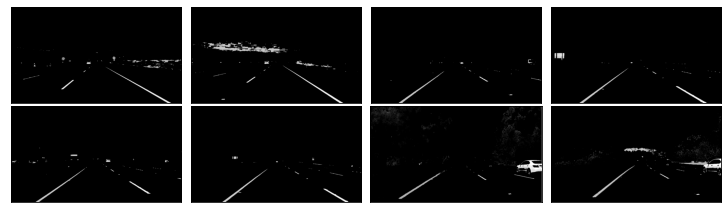

In [64]:
gray_images = list(map(gray_scale, color_selected_images))
list_images(gray_images)

### Applying Gaussian smoothing: Vì tất cả các kết quả phát hiện cạnh đều dễ bị ảnh hưởng bởi nhiễu hình ảnh, điều cần thiết là phải lọc ra để ngăn chặn phát hiện sai. Để làm mịn hình ảnh, một bộ lọc Gaussian được áp dụng để kết hợp với hình ảnh.

In [65]:
def gaussian_smoothing(image, kernel_size = 13):
    """Áp dụng bộ lọc Gaussian vào hình ảnh đầu vào. Kích thước của Gaussian kernel sẽ ảnh hưởng đến hiệu suất của máy dò.
            Nó phải là một số lẻ (3, 5, 7, ...).
    """
    return cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)

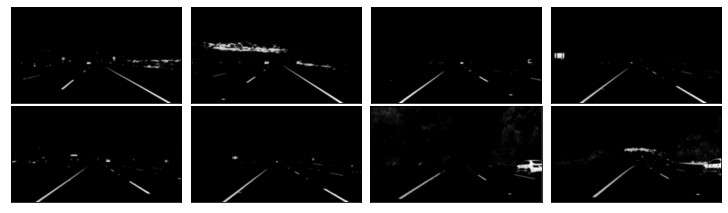

In [66]:
blur_images = list(map(gaussian_smoothing, gray_images))
list_images(blur_images)

## Applying Canny Edge Detection

In [22]:
def canny_detector(image, low_threshold = 50, high_threshold = 150):
    """
    Áp dụng thuật toán Phát hiện Cạnh Canny vào hình ảnh đầu vào."""
    return cv2.Canny(image, low_threshold, high_threshold)

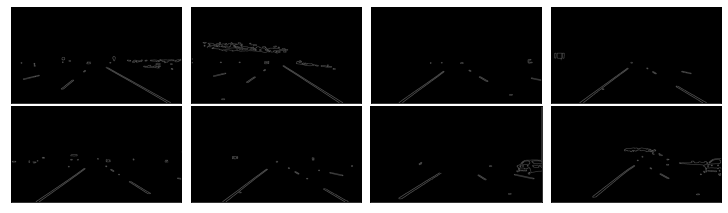

In [23]:
edge_detected_images = list(map(canny_detector, blur_images))
list_images(edge_detected_images)

## 4. Region of interest: Chỉ quan tâm đến khu vực đối diện với máy ảnh, nơi các vạch kẻ làn đường được tìm thấy. Áp dụng mặt nạ khu vực để cắt bỏ mọi thứ khác.

In [67]:
def region_selection(image):
    """Xác định và cắt khu vực quan tâm đến hình ảnh đầu vào."""
    mask = np.zeros_like(image)   
    #Xác định 3 kênh màu hoặc 1 kênh để lấp đầy mặt nạ tùy thuộc vào hình ảnh đầu vào
    if len(image.shape) > 2:
        channel_count = image.shape[2]
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    #Sử dụng các số cố định làm đỉnh của đa giác, không áp dụng cho các hình ảnh có độ phân tán khác nhau.
    rows, cols = image.shape[:2]
    bottom_left  = [cols * 0.1, rows * 0.95]
    top_left     = [cols * 0.4, rows * 0.6]
    bottom_right = [cols * 0.9, rows * 0.95]
    top_right    = [cols * 0.6, rows * 0.6]
    vertices = np.array([[bottom_left, top_left, top_right, bottom_right]], dtype=np.int32)
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    masked_image = cv2.bitwise_and(image, mask)
    return masked_image

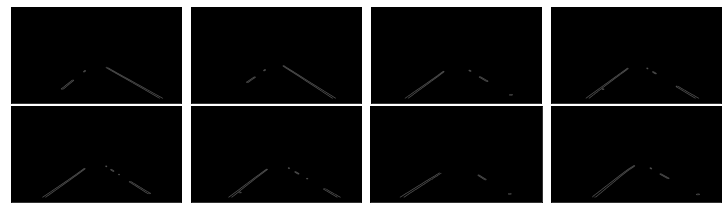

In [68]:
masked_image = list(map(region_selection, edge_detected_images))
list_images(masked_image)

## 5. Hough Transform: Là một kỹ thuật có thể được sử dụng để cô lập các tính năng của một hình dạng cụ thể trong một hình ảnh.

In [69]:
def hough_transform(image):
    """Xác định và cắt khu vực quan tâm đến hình ảnh đầu vào. Hình ảnh đầu ra của một biến đổi Canny."""
    rho = 1              #Độ phân giải khoảng cách của bộ tích lũy trong pixel.
    theta = np.pi/180    #Độ phân giải góc của bộ tích lũy trong radian(là đơn vị chuẩn để đo góc phẳng).
    threshold = 20       #Chỉ những đường lớn hơn ngưỡng mới được trả lại.
    minLineLength = 20   #Đoạn đường ngắn hơn thế bị bỏ.
    maxLineGap = 300     #Khoảng cách tối đa cho phép giữa các điểm trên cùng một dòng để liên kết.
    
    return cv2.HoughLinesP(image, rho = rho, theta = theta, threshold = threshold,
                           minLineLength = minLineLength, maxLineGap = maxLineGap)

In [70]:
#"hough_lines" chứa dòng được phát hiện trong khu vực được chọn rồi vẽ những đường được phát hiện vào "test_images" ban đầu.
hough_lines = list(map(hough_transform, masked_image))

In [71]:
def draw_lines(image, lines, color = [255, 0, 0], thickness = 2):
    """Vẽ đường lên hình ảnh đầu vào."""
    image = np.copy(image)
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(image, (x1, y1), (x2, y2), color, thickness)
    return image

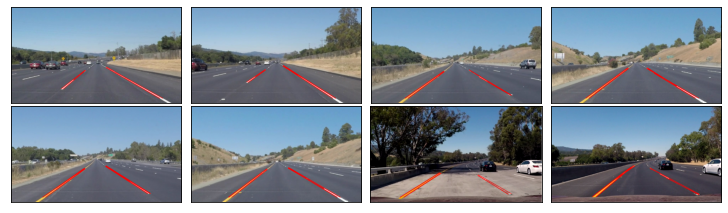

In [72]:
line_images = []
for image, lines in zip(test_images, hough_lines):
    line_images.append(draw_lines(image, lines))
    
list_images(line_images)

## 6. Averaging and extrapolating: Có nhiều dòng được phát hiện cho mỗi dòng của vạch kẻ làn đường. Cần trung bình tất cả các dòng này và vẽ một đường duy nhất cho mỗi vạch kẻ làn đường.
Chúng ta cũng cần ngoại suy các làn đường để bao quát toàn bộ chiều dài dòng làn đường.

In [73]:
def average_slope_intercept(lines):
    """
    Tìm độ dốc và chặn các làn đường bên trái và bên phải của mỗi hình ảnh.
    Dòng: Các dòng đầu ra từ Hough Transform.
    """
    left_lines    = [] #(dốc, chặn)
    left_weights  = [] #(Chiều dài)
    right_lines   = [] #(dốc, chặn)
    right_weights = [] #(Chiều dài)
    
    for line in lines:
        for x1, y1, x2, y2 in line:
            if x1 == x2:
                continue
            slope = (y2 - y1) / (x2 - x1)
            intercept = y1 - (slope * x1)
            length = np.sqrt(((y2 - y1) ** 2) + ((x2 - x1) ** 2))
            if slope < 0:
                left_lines.append((slope, intercept))
                left_weights.append((length))
            else:
                right_lines.append((slope, intercept))
                right_weights.append((length))
    left_lane  = np.dot(left_weights,  left_lines) / np.sum(left_weights)  if len(left_weights) > 0 else None
    right_lane = np.dot(right_weights, right_lines) / np.sum(right_weights) if len(right_weights) > 0 else None
    
    return left_lane, right_lane

In [74]:
def pixel_points(y1, y2, line):
    """
    Chuyển đổi độ dốc và chặn từng dòng của từng điểm pixel.
    y1: giá trị y của điểm xuất phát của dòng.
    y2: y-value của điểm cuối của dòng.
    line: Độ dốc và chặn của tuyến đường.
    """
    if line is None:
        return None
    slope, intercept = line
    x1 = int((y1 - intercept)/slope)
    x2 = int((y2 - intercept)/slope)
    y1 = int(y1)
    y2 = int(y2)
    return ((x1, y1), (x2, y2))

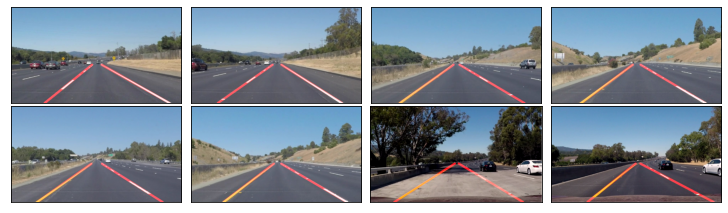

In [75]:
def lane_lines(image, lines):
    """
    Tạo các đường dài từ điểm pixel.
    image: Hình ảnh đầu vào.
    line: Các dòng đầu ra từ Hough Transform.
    """
    left_lane, right_lane = average_slope_intercept(lines)
    y1 = image.shape[0]
    y2 = y1 * 0.6
    left_line  = pixel_points(y1, y2, left_lane)
    right_line = pixel_points(y1, y2, right_lane)
    return left_line, right_line
    
def draw_lane_lines(image, lines, color=[255, 0, 0], thickness=12):
    """Vẽ đường lên hình ảnh đầu vào."""
    line_image = np.zeros_like(image)
    for line in lines:
        if line is not None:
            cv2.line(line_image, *line,  color, thickness)
    return cv2.addWeighted(image, 1.0, line_image, 1.0, 0.0)
             
lane_images = []
for image, lines in zip(test_images, hough_lines):
    lane_images.append(draw_lane_lines(image, lane_lines(image, lines)))
    
list_images(lane_images)

## 7. Trường hợp khác

### Hiệu chuẩn máy ảnh

In [76]:
from lanetracker.camera import CameraCalibration

calibrate = CameraCalibration(glob.glob('camera_cal/*.jpg'), retain_calibration_images=True)

In [77]:
os.listdir("test_in/") #Đọc dữ liệu

['10.jpg', '11.jpg', '12.jpg', '13.jpg', '9.jpg']

### Ngưỡng màu

Text(0.5, 1.0, 'Edges')

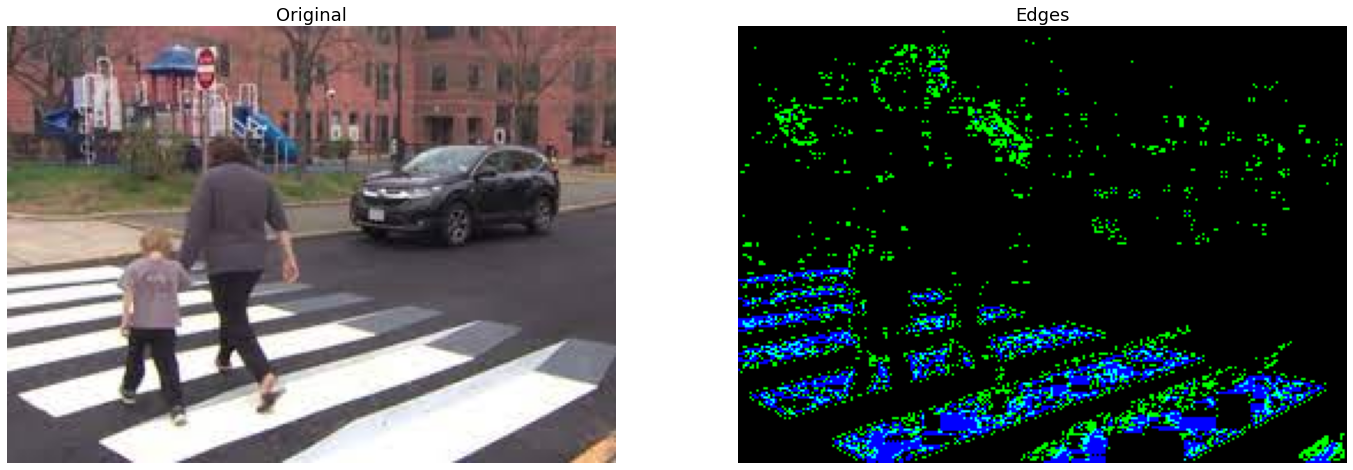

In [78]:
from lanetracker.gradients import get_edges

image = mpimg.imread("test_in/9.jpg")
result = get_edges(image, separate_channels=True)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))

ax1.axis('off')
ax1.imshow(image)
ax1.set_title('Original', fontsize=18)
ax2.axis('off')
ax2.imshow(result)
ax2.set_title('Edges', fontsize=18)

### Phối cảnh chuyển đổi

Text(0.5, 1.0, "Bird's eye view")

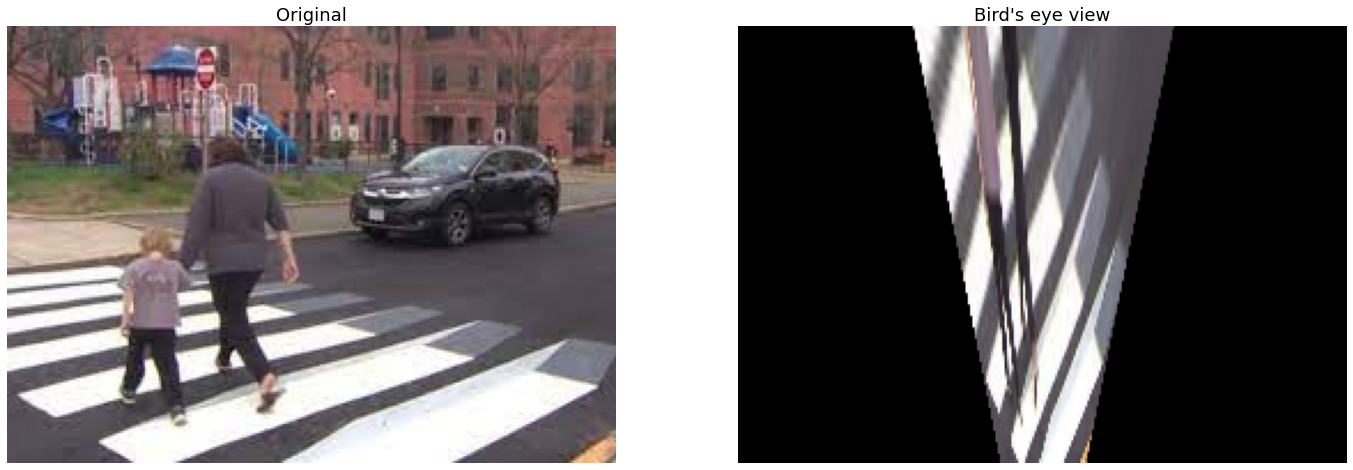

In [79]:
from lanetracker.perspective import flatten_perspective

image = mpimg.imread('test_in/9.jpg')
result, _ = flatten_perspective(image)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))

ax1.axis('off')
ax1.imshow(image)
ax1.set_title('Original', fontsize=18)
ax2.axis('off')
ax2.imshow(result)
ax2.set_title('Bird\'s eye view', fontsize=18)

### Tìm đường

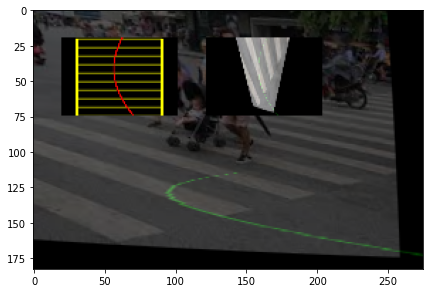

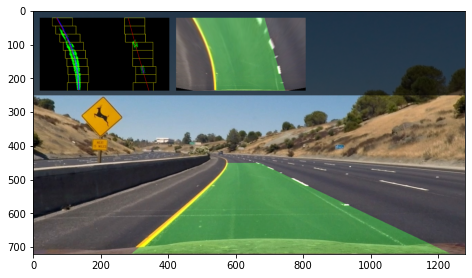

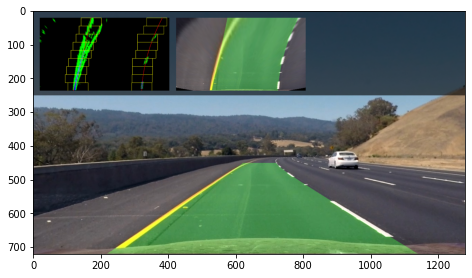

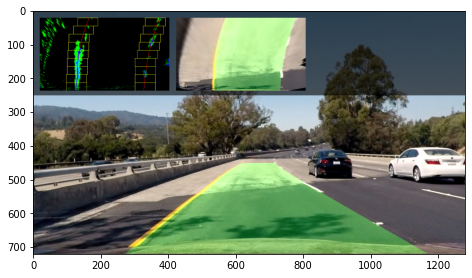

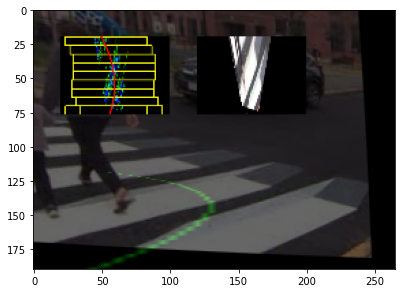

In [80]:
from lanetracker.tracker import LaneTracker

for image_name in glob.glob('test_in/*.jpg'):
    calibrated = calibrate(mpimg.imread(image_name))
    lane_tracker = LaneTracker(calibrated)
    overlay_frame = lane_tracker.process(calibrated, draw_lane=True, draw_statistics=True)
    mpimg.imsave(image_name.replace('test_in', 'test_out'), overlay_frame)
    plt.imshow(overlay_frame)
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
    plt.show()

## 8. Video

In [81]:
#Import packages
from moviepy import *
from IPython.display import HTML
from IPython.display import Image

In [82]:
os.listdir("Videos_input/") #Đọc dữ liệu video

['1.mp4', '2.mp4', '3.mp4']

In [83]:
def frame_processor(image):
    """Xử lý khung nhập liệu để phát hiện các đường làn đường. """
    color_select = HSL_color_selection(image)
    gray         = gray_scale(color_select)
    smooth       = gaussian_smoothing(gray)
    edges        = canny_detector(smooth)
    region       = region_selection(edges)
    hough        = hough_transform(region)
    result       = draw_lane_lines(image, lane_lines(image, hough))
    
    return result 

In [84]:
def process_video(test_video, output_video):
    """Đọc video đầu vào và tạo tệp video với các vạch kẻ làn đường được phát hiện."""
    input_video = VideoFileClip(os.path.join('videos_input', test_video), audio=False)
    processed = input_video.fl_image(frame_processor)
    processed.write_videofile(os.path.join('videos_output', output_video), audio=False)

In [89]:
%time process_video('2.mp4', 'KQDAURA.mp4')
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format("videos_output\KQDAURA.mp4"))

Moviepy - Building video videos_output\KQDAURA.mp4.
Moviepy - Writing video videos_output\KQDAURA.mp4



Moviepy - Done !
Moviepy - video ready videos_output\KQDAURA.mp4
Wall time: 22.1 s
